# YihangPiao


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import os

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv
Saving census_block_loc.csv to census_block_loc.csv
Saving listings-3.csv to listings-3.csv
Saving nyc_census_tracts.csv to nyc_census_tracts.csv
Saving NYPD_Complaint_Data.csv to NYPD_Complaint_Data.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
blocks = pd.read_csv("census_block_loc.csv")
blocks = blocks[blocks.County.isin(['Bronx','Kings','New York','Queens','Richmond'])]
blocks['Tract'] = blocks.BlockCode // 10000
blocks.head()

,Latitude,Longitude,BlockCode,County,State,Tract
15,40.48,-74.232513,360859901000011,Richmond,NY,36085990100
16,40.48,-74.229347,360859901000011,Richmond,NY,36085990100
17,40.48,-74.226181,360859901000011,Richmond,NY,36085990100
18,40.48,-74.223015,360859901000011,Richmond,NY,36085990100
19,40.48,-74.219849,360859901000011,Richmond,NY,36085990100


In [ ]:
income_df = pd.read_csv("nyc_census_tracts.csv")
income_df.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [ ]:
# Ensuring that 'Tract' in blocks and 'CensusTract' in income_df are of the same data type for accurate merging
blocks['Tract'] = blocks['Tract'].astype(int)
income_df['CensusTract'] = income_df['CensusTract'].astype(int)

# Merging the 'filtered_blocks' dataframe with 'income_df' on their respective Tract columns
blocks = blocks.merge(income_df, how='left', left_on='Tract', right_on='CensusTract')

blocks.info()
blocks.Income = pd.to_numeric(blocks.Income,errors='coerce')
blocks=blocks.dropna(how="any")

blocks

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18053 entries, 0 to 18052
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude         18053 non-null  float64
 1   Longitude        18053 non-null  float64
 2   BlockCode        18053 non-null  int64  
 3   County_x         18053 non-null  object 
 4   State            18053 non-null  object 
 5   Tract            18053 non-null  int64  
 6   CensusTract      18052 non-null  float64
 7   County_y         18052 non-null  object 
 8   Borough          18052 non-null  object 
 9   TotalPop         18052 non-null  float64
 10  Men              18052 non-null  float64
 11  Women            18052 non-null  float64
 12  Hispanic         12999 non-null  float64
 13  White            12999 non-null  float64
 14  Black            12999 non-null  float64
 15  Native           12999 non-null  float64
 16  Asian            12999 non-null  float64
 17  Citizen     

,Latitude,Longitude,BlockCode,County_x,State,Tract,CensusTract,County_y,Borough,TotalPop,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
132,40.493568,-74.251508,360850244020002,Richmond,NY,36085024402,3.608502e+10,Richmond,Staten Island,4241.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
133,40.493568,-74.248342,360850244020002,Richmond,NY,36085024402,3.608502e+10,Richmond,Staten Island,4241.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
134,40.493568,-74.245176,360850244020002,Richmond,NY,36085024402,3.608502e+10,Richmond,Staten Island,4241.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
135,40.493568,-74.242010,360850244020002,Richmond,NY,36085024402,3.608502e+10,Richmond,Staten Island,4241.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
136,40.493568,-74.238844,360850244020002,Richmond,NY,36085024402,3.608502e+10,Richmond,Staten Island,4241.0,...,1.1,0.6,4.0,44.3,2046.0,75.2,21.2,3.6,0.0,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18042,40.911910,-73.915930,360050309000001,Bronx,NY,36005030900,3.600503e+10,Bronx,Bronx,3896.0,...,1.9,6.7,10.3,45.9,1301.0,78.6,10.0,10.5,0.9,5.5
18043,40.911910,-73.912764,360050309000001,Bronx,NY,36005030900,3.600503e+10,Bronx,Bronx,3896.0,...,1.9,6.7,10.3,45.9,1301.0,78.6,10.0,10.5,0.9,5.5
18044,40.911910,-73.909598,360050309001000,Bronx,NY,36005030900,3.600503e+10,Bronx,Bronx,3896.0,...,1.9,6.7,10.3,45.9,1301.0,78.6,10.0,10.5,0.9,5.5
18047,40.911910,-73.900101,360050337002000,Bronx,NY,36005033700,3.600503e+10,Bronx,Bronx,2277.0,...,3.2,1.4,6.0,43.0,1007.0,73.4,23.2,3.4,0.0,8.0


In [ ]:
crime_df = pd.read_csv('NYPD_Complaint_Data.csv', index_col=False)
crime_df=crime_df[crime_df.OFNS_DESC == "BURGLARY"]
crime_df.drop(columns = ["SUSP_AGE_GROUP","SUSP_RACE","SUSP_SEX","TRANSIT_DISTRICT","STATION_NAME","PARKS_NM","HADEVELOPT","HOUSING_PSA"],inplace = True)

crime_df = crime_df[crime_df['Latitude'].notna()]
crime_df = crime_df[crime_df['Longitude'].notna()]
crime_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
5305,820860100,01/21/2019,04:29:00,01/22/2019,04:40:00,17,01/22/2019,107,BURGLARY,213,...,0,992786.0,214702.0,40.755988,-73.969191,"(40.75598800500006, -73.96919089299998)",PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,D
5309,295998118,01/22/2019,00:00:00,01/22/2019,06:00:00,18,01/22/2019,107,BURGLARY,213,...,0,987501.0,217778.0,40.764434,-73.988266,"(40.76443435900006, -73.988265529)",PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,D
5332,662833797,01/22/2019,07:30:00,01/22/2019,14:30:00,105,01/22/2019,107,BURGLARY,221,...,0,1052322.0,203059.0,40.723773,-73.754415,"(40.72377307100004, -73.75441510199995)",PATROL BORO QUEENS SOUTH,25-44,ASIAN / PACIFIC ISLANDER,F
5418,138156542,01/21/2019,21:00:00,01/21/2019,21:15:00,114,01/22/2019,107,BURGLARY,223,...,2,1002494.0,216454.0,40.760782,-73.934145,"(40.760782095000025, -73.93414527799997)",PATROL BORO QUEENS NORTH,18-24,WHITE,F
5488,115175643,01/21/2019,19:45:00,01/22/2019,10:00:00,40,01/22/2019,107,BURGLARY,243,...,0,1010503.0,236634.0,40.816151,-73.905156,"(40.816150608000044, -73.90515598699994)",PATROL BORO BRONX,UNKNOWN,UNKNOWN,D


In [ ]:
crime =crime_df["BORO_NM"].str.split('|', expand=True).stack().value_counts()
print(crime)

def Average(lst):
    return np.sum(lst) / len(lst)

meancrime = Average(crime)
print("Average Crime in NYC : ",meancrime)

BROOKLYN         161
MANHATTAN        131
QUEENS           112
BRONX             92
STATEN ISLAND     18
dtype: int64
Average Crime in NYC :  102.8


In [ ]:
income_df = income_df[income_df['IncomePerCap'].notna()]
def county(geography):
  if "Manhattan" in geography:
    return "Manhattan"
  elif "Brooklyn" in geography:
    return "Brooklyn"
  elif "Queens" in geography:
    return "Queens"
  elif "Staten Island" in geography:
    return "Staten Island"
  elif "Bronx" in geography:
    return "Bronx"
income_df["Borough"]=income_df["Borough"].apply(county)
frequency =income_df["Borough"].str.split('|', expand=True).stack().value_counts()
print(frequency)

Brooklyn         750
Queens           646
Bronx            336
Manhattan        281
Staten Island    108
dtype: int64


<ipython-input-11-359b0e002dc9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df["Borough"]=income_df["Borough"].apply(county)


In [ ]:
df = pd.read_csv('AB_NYC_2019.csv', index_col=False)
newdata = pd.read_csv('listings-3.csv')
newdata = newdata[['id','review_scores_rating']]
newdata2=df.merge(newdata, on='id')
newdata2=newdata2.dropna(how="any")
df=newdata2
df

<ipython-input-12-0b03a6340832>:2: DtypeWarning: Columns (61,62,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  newdata = pd.read_csv('listings-3.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,94.0
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,90.0
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,90.0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,36273046,Elegant Spacious UES private room,267839371,Celine,Manhattan,Upper East Side,40.77551,-73.95404,Private room,120,1,1,2019-07-06,1.00,2,358,96.0
35727,36318560,Luxury Sun-filled Private Room near Time Square,52917571,Linda Lou,Manhattan,Midtown,40.75286,-73.99297,Private room,120,2,1,2019-07-06,1.00,1,7,100.0
35744,36344079,The Little Castle in Astoria,3867848,Prince,Queens,Astoria,40.76887,-73.91128,Private room,150,1,1,2019-07-04,1.00,1,165,100.0
35811,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147,97.0


In [ ]:
crime_df = pd.read_csv('NYPD_Complaint_Data.csv', index_col=False)
crime_df=crime_df[crime_df.OFNS_DESC == "BURGLARY"]
crime_df.drop(columns = ["SUSP_AGE_GROUP","SUSP_RACE","SUSP_SEX","TRANSIT_DISTRICT","STATION_NAME","PARKS_NM","HADEVELOPT","HOUSING_PSA"],inplace = True)

crime_df = crime_df[crime_df['Latitude'].notna()]
crime_df = crime_df[crime_df['Longitude'].notna()]

crime_df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,PATROL_BORO,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
5305,820860100,01/21/2019,04:29:00,01/22/2019,04:40:00,17,01/22/2019,107,BURGLARY,213,...,0,992786.0,214702.0,40.755988,-73.969191,"(40.75598800500006, -73.96919089299998)",PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,D
5309,295998118,01/22/2019,00:00:00,01/22/2019,06:00:00,18,01/22/2019,107,BURGLARY,213,...,0,987501.0,217778.0,40.764434,-73.988266,"(40.76443435900006, -73.988265529)",PATROL BORO MAN SOUTH,UNKNOWN,UNKNOWN,D
5332,662833797,01/22/2019,07:30:00,01/22/2019,14:30:00,105,01/22/2019,107,BURGLARY,221,...,0,1052322.0,203059.0,40.723773,-73.754415,"(40.72377307100004, -73.75441510199995)",PATROL BORO QUEENS SOUTH,25-44,ASIAN / PACIFIC ISLANDER,F
5418,138156542,01/21/2019,21:00:00,01/21/2019,21:15:00,114,01/22/2019,107,BURGLARY,223,...,2,1002494.0,216454.0,40.760782,-73.934145,"(40.760782095000025, -73.93414527799997)",PATROL BORO QUEENS NORTH,18-24,WHITE,F
5488,115175643,01/21/2019,19:45:00,01/22/2019,10:00:00,40,01/22/2019,107,BURGLARY,243,...,0,1010503.0,236634.0,40.816151,-73.905156,"(40.816150608000044, -73.90515598699994)",PATROL BORO BRONX,UNKNOWN,UNKNOWN,D


In [ ]:
def pricecategories(price):
  pricem=price['price']
  for i in range(5):
    if (i *200 < pricem) & ( pricem<=i*200+200):
      return i

df = df[df['latitude'].notna()]
df = df[df['longitude'].notna()]
df=df.loc[df.price<1000]
df = df.loc[df.price > 0]


df["label"]=df.apply(pricecategories,axis=1)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_scores_rating,label
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,94.0,1
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,89.0,0
2,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,90.0,0
3,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,90.0,0
4,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,84.0,0


In [ ]:
minlat = df["latitude"].min(axis=0)
minlong= df["longitude"].min(axis=0)
maxlat = df["latitude"].max(axis=0)
maxlong = df["longitude"].max(axis=0)
farlat = (maxlat-minlat)/10
farlong=(maxlong-minlong)/10
print("The min latitude is {}".format(df["latitude"].min(axis=0)))
print("The min longitude is {}".format(df["longitude"].min(axis=0)))
print("The max latitude is {}".format(df["latitude"].max(axis=0)))
print("The max longitude is {}".format(df["longitude"].max(axis=0)))
print("Differences between latitudes is {}".format(farlat*10))
print("Differences between longitudes is {}".format(farlong*10))


sizelist=[]
for i,j in zip(df["latitude"],df["longitude"]):
  size=crime_df.loc[(crime_df["Latitude"]> i-farlat) &(crime_df["Latitude"]<i+farlat) &(crime_df["Longitude"]>j-farlong) &(crime_df["Longitude"]<j+farlong)].shape[0]
  sizelist.append(size)
df["near_crime"] = sizelist

The min latitude is 40.50868
The min longitude is -74.23986
The max latitude is 40.90804
The max longitude is -73.71299
Differences between latitudes is 0.3993600000000015
Differences between longitudes is 0.5268699999999882


In [ ]:
incomelist=[]
for i,j in zip(df["latitude"],df["longitude"]):
  size=blocks.loc[(blocks["Latitude"]>i-farlat) &(blocks["Longitude"]<i+farlat) &(blocks["Longitude"]>j-farlong) &(blocks["Longitude"]<j+farlong)]
  meansize=size["IncomePerCap"].mean(axis=0)
  incomelist.append(meansize)
df["near_income"] = incomelist

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X =df[["near_crime","near_income"]]
y =df["label"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=0)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_remaining)
rf_acc = accuracy_score(y_remaining, rf_predictions)
print("Random Forest Accuracy:"+str(rf_acc))

Random Forest Accuracy:0.8447937131630648


In [ ]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X)
y2 = LabelEncoder().fit_transform(y)
X_train2, X_remaining2, y_train2, y_remaining2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train2, y_train2)
rf_predictions = model_rf.predict(X_remaining2)
rf_acc = accuracy_score(y_remaining2, rf_predictions)
print("Random Forest Accuracy:"+str(rf_acc))

Random Forest Accuracy:0.8449723164850866


add more features

In [ ]:
import math
def euclideandistance(x,y,m1,m2):
  return math.sqrt(sum([(x - m1) ** 2+(y-m2)**2]))


In [ ]:
euclideandistance=[euclideandistance(i,j,40.7831,-73.9712) for i,j in zip(df["latitude"],df["longitude"])]
a=np.array(euclideandistance)
df["Center Distance"]=a
df.neighbourhood_group.unique()
import numpy as np

def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x
selection_sort(a)

manhattandistances=df["Center Distance"][df.neighbourhood_group=="Manhattan"]
brooklyndistances=df["Center Distance"][df.neighbourhood_group=="Brooklyn"]
queensdistances=df["Center Distance"][df.neighbourhood_group=="Queens"]
StatenIslanddistances=df["Center Distance"][df.neighbourhood_group=="Staten Island"]
Bronxdistances=df["Center Distance"][df.neighbourhood_group=="Bronx"]

manhattandistancesarray=np.array(manhattandistances)
brooklyndistancessarray=np.array(brooklyndistances)
queensdistancessarray=np.array(queensdistances)
StatenIslanddistancessarray=np.array(StatenIslanddistances)
Bronxdistancessarray=np.array(Bronxdistances)

selection_sort(manhattandistancesarray)
selection_sort(brooklyndistancessarray)
selection_sort(queensdistancessarray)
selection_sort(StatenIslanddistancessarray)
selection_sort(Bronxdistancessarray)

print(manhattandistancesarray.shape)
print(brooklyndistancessarray.shape)
print(queensdistancessarray.shape)
print(StatenIslanddistancessarray.shape)
print(Bronxdistancessarray.shape)

def categorizedistance(row):
  centerdistance=row["Center Distance"]
  neighbourhoodgrp=row["neighbourhood_group"]
  if neighbourhoodgrp=="Manhattan":
    if centerdistance<0.03049026729957918:
      return 0
    elif (0.03049026729957918< centerdistance) and (centerdistance<0.05446495019734937):
      return 1
    else:
      return 2
  if neighbourhoodgrp=="Brooklyn":
    if centerdistance<0.0937867463984107:
      return 0
    elif (0.0937867463984107< centerdistance) and (centerdistance<0.11028837880755411):
      return 1
    else:
      return 2
  if neighbourhoodgrp=="Queens":
    if centerdistance<0.06712938924197284:
      return 0
    elif (0.06712938924197284< centerdistance) and (centerdistance<0.1396300845090239):
      return 1
    else:
      return 2
  if neighbourhoodgrp=="Staten Island":
    if centerdistance<0.1915125909698905:
      return 0
    elif (0.1915125909698905< centerdistance) and (centerdistance<0.21802457132167005):
      return 1
    else:
      return 2
  if neighbourhoodgrp=="Bronx":
    if centerdistance<0.09245849068635675:
      return 0
    elif (0.09245849068635675< centerdistance) and (centerdistance<0.13281655657333968):
      return 1
    else:
      return 2
df["Categorized Distance"]=df.apply(categorizedistance,axis=1)

(11714,)
(12089,)
(3303,)
(217,)
(669,)


In [ ]:
df["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [ ]:
def classifyfunc(room_type):
  if room_type=="Entire home/apt":
    return 0
  elif room_type=="Private room":
    return 1
  elif room_type=="Shared room":
    return 2
df["room_type"]=df["room_type"].apply(classifyfunc)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
X =df[["near_crime","near_income","number_of_reviews","review_scores_rating","Categorized Distance","room_type"]]
y =df["label"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X)
y2 = LabelEncoder().fit_transform(y)
X_train2, X_remaining2, y_train2, y_remaining2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
rf_predictions = model_rf.predict(X_remaining)
rf_acc = accuracy_score(y_remaining, rf_predictions)
print("Random Forest Accuracy:"+str(rf_acc))

Random Forest Accuracy:0.8540810859081979


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model_svc = SVC(random_state=42)
model_svc.fit(X_train, y_train)
svc_predictions = model_svc.predict(X_remaining)
svc_acc = accuracy_score(y_remaining, svc_predictions)
print("SVM Accuracy: " + str(svc_acc))


SVM Accuracy: 0.8662261118056795


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
dt_predictions = model_dt.predict(X_remaining)
dt_acc = accuracy_score(y_remaining, dt_predictions)
print("Decision Tree Accuracy: " + str(dt_acc))


Decision Tree Accuracy: 0.7976424361493124


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(X_train, y_train)
ab_predictions = model_ab.predict(X_remaining)
ab_acc = accuracy_score(y_remaining, ab_predictions)
print("AdaBoost Accuracy: " + str(ab_acc))


AdaBoost Accuracy: 0.8631898553313092


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
gb_predictions = model_gb.predict(X_remaining)
gb_acc = accuracy_score(y_remaining, gb_predictions)
print("Gradient Boosting Accuracy: " + str(gb_acc))


Gradient Boosting Accuracy: 0.8680121450258975


after scaling

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train2, y_train2)
rf_predictions = model_rf.predict(X_remaining2)
rf_acc = accuracy_score(y_remaining2, rf_predictions)
print("Random Forest Accuracy:"+str(rf_acc))

Random Forest Accuracy:0.8542596892302197


In [ ]:
model_svc = SVC(random_state=42)
model_svc.fit(X_train2, y_train2)
svc_predictions = model_svc.predict(X_remaining2)
svc_acc = accuracy_score(y_remaining2, svc_predictions)
print("SVM Accuracy: " + str(svc_acc))


SVM Accuracy: 0.8662261118056795


In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train2, y_train2)
dt_predictions = model_dt.predict(X_remaining2)
dt_acc = accuracy_score(y_remaining2, dt_predictions)
print("Decision Tree Accuracy: " + str(dt_acc))


Decision Tree Accuracy: 0.7969280228612252


In [ ]:
model_ab = AdaBoostClassifier(random_state=42)
model_ab.fit(X_train2, y_train2)
ab_predictions = model_ab.predict(X_remaining2)
ab_acc = accuracy_score(y_remaining2, ab_predictions)
print("AdaBoost Accuracy: " + str(ab_acc))


AdaBoost Accuracy: 0.8631898553313092


In [ ]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train2, y_train2)
gb_predictions = model_gb.predict(X_remaining2)
gb_acc = accuracy_score(y_remaining2, gb_predictions)
print("Gradient Boosting Accuracy: " + str(gb_acc))


Gradient Boosting Accuracy: 0.8680121450258975


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop("label", axis=1)
y =df["label"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=0)

<ipython-input-39-eba0bf773d45>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


price                             0.874830
room_type                         0.268475
near_income                       0.263812
longitude                         0.166071
Center Distance                   0.133328
calculated_host_listings_count    0.108648
availability_365                  0.097079
near_crime                        0.067118
number_of_reviews                 0.044086
review_scores_rating              0.041570
reviews_per_month                 0.040958
latitude                          0.026789
host_id                           0.017034
id                                0.003386
minimum_nights                    0.002217
Categorized Distance              0.000378
Name: label, dtype: float64


<Axes: >

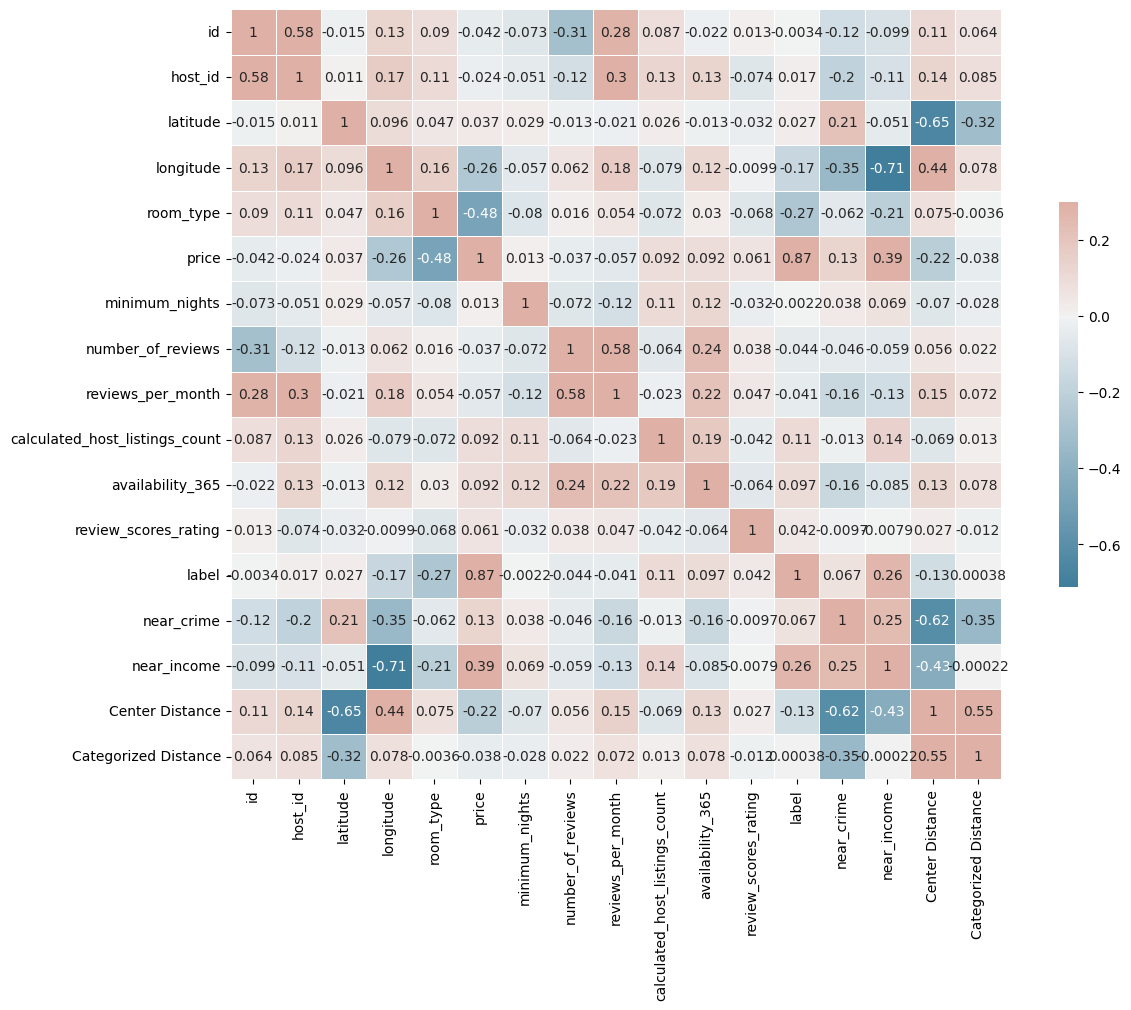

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr = df.corr()

label_correlation = corr["label"].drop("label")

label_correlation = label_correlation.abs().sort_values(ascending=False)

print(label_correlation)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    annot=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)


In [ ]:
X =df[["near_crime","longitude","calculated_host_listings_count","availability_365","near_income","number_of_reviews","review_scores_rating","Categorized Distance","room_type"]]
y =df["label"]
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X)
y2 = LabelEncoder().fit_transform(y)
X_train2, X_remaining2, y_train2, y_remaining2 = train_test_split(X2, y2, test_size=0.20, random_state=0)

In [ ]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
gb_predictions = model_gb.predict(X_remaining)
gb_acc = accuracy_score(y_remaining, gb_predictions)
print("Gradient Boosting Accuracy: " + str(gb_acc))


Gradient Boosting Accuracy: 0.8710484015002679


# Min Feng

1. get train and test dataset

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import ElasticNet

In [ ]:
# df
X =df[["near_crime","near_income","number_of_reviews","review_scores_rating","Categorized Distance","room_type"]]
y =df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

2. Lasso Regression

In [ ]:
# define a function, return validation mse under each lasso alpha:
def lasso_mses(X_train, X_test, y_train, y_test):
    # For Lasso Regression:
    # Define alphas
    n_alphas = 200
    alphas = np.logspace(-4, 1, n_alphas)
    mse_valid_per_alpha = [] # used to collect mse under each alpha

    # Define scalers
    std_scaler = preprocessing.StandardScaler()

    # For each alpha:
    for a in alphas:
        model=linear_model.Lasso(alpha=a)
        pipe = pipeline.Pipeline([('scaler', std_scaler), ('model', model)])
        pipe.fit(X_train, y_train)
        mse_valid_per_alpha.append(mean_squared_error(y_true=y_test, y_pred=pipe.predict(X_test)))

    return mse_valid_per_alpha

# least mse
least_lasso_mses = min(lasso_mses(X_train, X_test, y_train, y_test))
least_lasso_mses

0.1713166416582119

In [ ]:
# find alpha with least mse
n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)
least_lasso_mses_alpha = alphas[np.argmin(lasso_mses(X_train, X_test, y_train, y_test))]
least_lasso_mses_alpha

0.005415871378079476

In [ ]:
def lasso_formula(X_train, y_train, alpha):
    std_scaler = preprocessing.StandardScaler()
    lasso = linear_model.Lasso(alpha=alpha)
    pipe = pipeline.Pipeline([('scaler', std_scaler), ('model', lasso)])
    pipe.fit(X_train, y_train)

    coefs = pipe.named_steps['model'].coef_
    intercept = pipe.named_steps['model'].intercept_
    feature_names = X_train.columns

    formula = "y = " + str(intercept)
    for coef, feature in zip(coefs, feature_names):
        formula += " + (" + str(coef) + " * " + feature + ")"

    return formula

# Print the formula for the best alpha
lasso_formula(X_train, y_train, least_lasso_mses_alpha)

'y = 0.1687134372348502 + (0.0 * near_crime) + (0.09588433374586126 * near_income) + (-0.008261857068571389 * number_of_reviews) + (0.010084408024675966 * review_scores_rating) + (0.0 * Categorized Distance) + (-0.0992012650587613 * room_type)'

3. Ridge Regression

In [ ]:
# define a function, return validation mse under each ridge scaler:
def ridge_mses(X_train, X_test, y_train, y_test):
    # For Ridge Regression:
    # Define alphas
    n_alphas = 200
    alphas = np.logspace(-4, 1, n_alphas)
    mse_valid_per_alpha = []

    # Define scalers
    std_scaler = preprocessing.StandardScaler()

    # For each alpha:
    for a in alphas:
        model=linear_model.Ridge(alpha=a)
        pipe = pipeline.Pipeline([('scaler', std_scaler), ('model', model)])
        pipe.fit(X_train, y_train)
        mse_valid_per_alpha.append(mean_squared_error(y_true=y_test, y_pred=pipe.predict(X_test)))

    return mse_valid_per_alpha

# least mse
least_ridge_mses = min(ridge_mses(X_train, X_test, y_train, y_test))
least_ridge_mses

0.17142644120366496

In [ ]:
# find alpha with least mse
least_ridge_mses_alpha = alphas[np.argmin(ridge_mses(X_train, X_test, y_train, y_test))]
least_ridge_mses_alpha

10.0

In [ ]:
def ridge_formula(X_train, y_train, alpha):
    std_scaler = preprocessing.StandardScaler()
    ridge = linear_model.Ridge(alpha=alpha)
    pipe = pipeline.Pipeline([('scaler', std_scaler), ('model', ridge)])
    pipe.fit(X_train, y_train)

    coefs = pipe.named_steps['model'].coef_
    intercept = pipe.named_steps['model'].intercept_
    feature_names = X_train.columns

    formula = "y = " + str(intercept)
    for coef, feature in zip(coefs, feature_names):
        formula += " + (" + str(coef) + " * " + feature + ")"

    return formula

# Print the formula for the best alpha
ridge_formula(X_train, y_train, least_ridge_mses_alpha)

'y = 0.1687134372348502 + (-0.0007469640146103995 * near_crime) + (0.10031903672505019 * near_income) + (-0.013578287856380834 * number_of_reviews) + (0.015440879038215541 * review_scores_rating) + (-5.727337523512252e-05 * Categorized Distance) + (-0.10323355084144357 * room_type)'

4. Elastic Net

In [ ]:
# this function is used to determine the lowest mse given a mse_list
def determine_least_mse(mse_valid):
    mse_array_2d = np.array(mse_valid) # convert to 2d array
    mse_min = np.min(mse_array_2d) # find the minimum value
    min_index_linear = np.argmin(mse_array_2d) # find the linear index of the minimum value
    min_index_2d = np.unravel_index(min_index_linear, mse_array_2d.shape) # convert the linear index to a 2D index
    print(f"Minimum validation mse is {mse_min} at position {min_index_2d}")
    return mse_min, min_index_2d

In [ ]:
# define a function, return validation mse under each elastic scaler:
def elastic_mses(X_train, X_test, y_train, y_test):
    # For Elastic Net:
    # Define alphas and l1_ratios
    n_alphas = 200
    alphas = np.logspace(-4, 1, n_alphas)
    l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.97, 0.99]

    # Define scalers
    std_scaler = preprocessing.StandardScaler()

    # For each alpha:
    mse_valid_per_alpha = []
    for a in alphas:
      mse_valid_per_l1 = []
      # for each l1 ratio
      for l1_ratio in l1_ratios:
          model = ElasticNet(alpha=a, l1_ratio=l1_ratio)
          pipe = pipeline.Pipeline([('scaler', scaler), ('model', model)])
          pipe.fit(X_train, y_train)
          mse_valid_per_l1.append(mean_squared_error(y_true=y_test, y_pred=pipe.predict(X_test)))
      mse_valid_per_alpha.append(mse_valid_per_l1)

    return mse_valid_per_alpha

determine_least_mse(elastic_mses(X_train, X_test, y_train, y_test))

Minimum validation mse is 0.17131635007077473 at position (81, 2)


(0.17131635007077473, (81, 2))

In [ ]:
# find alpha & l1 ratio with least mse
n_alphas = 200
alphas = np.logspace(-4, 1, n_alphas)
l1_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.97, 0.99]
mse_min, min_index_2d = determine_least_mse(elastic_mses(X_train, X_test, y_train, y_test))
alpha_idx = min_index_2d[0]
l1_idx = min_index_2d[1]
least_elastic_mses_alpha = alphas[alpha_idx]
least_l1_ratio = l1_ratios[l1_idx]
# print out best alpha & l1 ratio
least_elastic_mses_alpha, least_l1_ratio

Minimum validation mse is 0.17131635007077473 at position (81, 2)


(0.010843659686896108, 0.5)

In [ ]:
def elastic_formula(X_train, y_train, alpha, l1_ratio):
    std_scaler = preprocessing.StandardScaler()
    elastic = linear_model.ElasticNet(alpha=a, l1_ratio=l1_ratio)
    pipe = pipeline.Pipeline([('scaler', std_scaler), ('model', elastic)])
    pipe.fit(X_train, y_train)

    coefs = pipe.named_steps['model'].coef_
    intercept = pipe.named_steps['model'].intercept_
    feature_names = X_train.columns

    formula = "y = " + str(intercept)
    for coef, feature in zip(coefs, feature_names):
        formula += " + (" + str(coef) + " * " + feature + ")"

    return formula

# Print the formula for the best alpha
elastic_formula(X_train, y_train, least_elastic_mses_alpha, least_l1_ratio)

InvalidParameterError: ignored

# Zhaoyuan Shi KNN

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

%matplotlib inline


In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
